In [7]:
### LUCKY KOFI GBEDA 
### BCB546 Python Assignment 

In [ ]:

######################## BCB 546X: Python Assignment Details ########################

# ** Your Mission: Complete Python code in a Jupyter Notebook ** #

# In these commented lines, you will find a list of tasks. Below, within the code, you will find
# suggestions on how to complete this. Conveniently, you can load this script into a Jupyter cell
# using the `%load` magic command. You might find that useful. 

#-- Functions --#
## 1. Document Dr. X's function with comments and with markdown text in your Jupyter notebook.
## 2. Write a function that translates a string of nucleotides to amino acids based on Dr. X's pseudo-code suggestion.
## 3. Write an alternative translation function.
## 4. Write a function that calculates the molecular weight of each 3 amino acid sequence.
## 5. Write a function that computes the GC-content of each DNA sequence.

#-- In the MAIN part of the script --#
## 6. Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## 7. Call your functions from step 3 (or step 2) and step 4 and fill in the new columns in the DataFrame.
## 8. Plot a bar-chart of adult body mass per species. In your description of the graph, provide text that answers these questions: 
#       a. What is the smallest penguin species? 
#       b. What is the geographical range of this species?
## 9. Plot a graph that shows the molecular weight as a function of GC content. 
## 10. Write the entire DataFrame to a new CSV file that includes your new columns.
## 11. BONUS: What other visualizations, functions or tasks would you do with this dataset? Add something interesting for fun. (0.5 additional points if your total score is < 15).

#-- Additional Instructions (points will be deducted if these instructions are not heeded) --#
## ** Do all of this in a Jupyter notebook and push it to a GitHub repository.
## ** Your repository should not contain any files other than those associated with this assignment. 
## ** Read all comments carefully and answer the questions by including information in your Jupyter notebook.
## ** Document all of your code (and Dr. X's code) very thoroughly so that it is clear what you did.
## ** Include in-code comments to document functions and markdown comments to document rationale.
## ** Be sure to cite (by providing URLs or other appropriate citations) information appropriately in your documented notebook.
## ** Commit and push your completed work in the Jupyter notebook to your repository.
## ** Submit the URL to your git repository via Canvas by the end of the day on May 7, 2025.

#-- Disclaimer --#
## Not all of these tasks have been covered in class and you will have to use online resources to find out how to do some of these tasks.


######################## Python Translate Script ########################

## Here's the start of our Python script. Thanks for completing it for me! - Dr. X
## IMPORTANT: install BioPython so that this will work 


In [1]:
## Install the needeed parkages 
# -------------------------------------------
# Package Installation 
# -------------------------------------------

# This cell ensures all necessary packages are installed.

# Install BioPython (for sequence handling, translation, and molecular weight)
!pip install biopython

# Install pandas (for working with structured data, like CSVs)
!pip install pandas

# Install numpy (for numerical operations)
!pip install numpy

# Install matplotlib (for plotting graphs and charts)
!pip install matplotlib

# Install seaborn (for  correlation heatmaps and statistical plots)
!pip install seaborn


In [3]:
# ------------------------------------------
# Import the necessary libraries
# ------------------------------------------

# Importing Biopython's SeqIO module for reading and parsing DNA sequences from FASTA files
from Bio import SeqIO

# Importing the CodonTable to access standard and mitochondrial codon translation tables
from Bio.Data import CodonTable

# Imports the Seq class from Biopython for creating and manipulating biological sequences
from Bio.Seq import Seq  
# Importing pandas for handling structured data (e.g., reading and modifying CSV files)
import pandas as pd

# Importing numpy for numerical operations (e.g., creating NaN values, numerical arrays)
import numpy as np

# Importing matplotlib's pyplot for creating plots such as bar charts and scatter plots
import matplotlib.pyplot as plt

# Importing seaborn for advanced statistical plots and visually appealing graphics 
import seaborn as sns

# Import the colormap module from matplotlib for generating color schemes
import matplotlib.cm as cm  
# Importing the 'os' module to interact with the operating system (e.g., file paths, directories)
import os

# Imports ProteinAnalysis class for calculating properties of protein sequences (e.g., molecular weight)
from Bio.SeqUtils.ProtParam import ProteinAnalysis  

# Import Counter class to count occurrences of elements in sequences (e.g., nucleotides or amino acids)
from collections import Counter 

# Import PCA (Principal Component Analysis) for dimensionality reduction
from sklearn.decomposition import PCA

# Import StandardScaler to normalize data before applying PCA   
from sklearn.preprocessing import StandardScaler  

# Import function to split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Import Random Forest algorithm for classification tasks
from sklearn.ensemble import RandomForestClassifier

# Import utility to generate a performance report for classification models
from sklearn.metrics import classification_report


In [ ]:
#%%%%%%%%%%%%%%%#
### FUNCTIONS ###
#%%%%%%%%%%%%%%%#

In [5]:
## 1 ##
####### GET SEQUENCES FUNCTION ########
## Dr. X: this gets sequences 
## Please properly document this function in the Jupyter notebook 
## Your descriptions of all functions should contain information about what the function does,
## as well as information about the return types and arguments.
# -------------------------------------------------------------
# 1  GET SEQUENCES FUNCTION ########
# -------------------------------------------------------------
# This function reads a FASTA file and extracts DNA sequences for each penguin species.
# It returns a dictionary where the keys are species names and the values are their DNA sequences.
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}  # Initialize an empty dictionary to store species and their sequences
    
    # Use SeqIO to parse the FASTA file, one record at a time
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()  # Split the description into words
        species_name = description[1] + " " + description[2]  # Combine genus and species names
        sequence_data_dict[species_name] = record.seq  # Store sequence under the species name
    
    return sequence_data_dict  # Return the full dictionary of sequences

# -------------------------------------------------------------
# Testing the Function: Load Sequences from FASTA
# -------------------------------------------------------------
# Define the full path to the FASTA file using os.path.join for portability
path = r"C:\Users\lkgbe\OneDrive - Iowa State University\Documents\ISU\SPRING 2025\BCB4560\Python_Assigment"
fasta_fn = os.path.join(path, "penguins_cytb.fasta")  # Join folder path with filename
# Call the function to retrieve the sequences dictionary
get_sequences_from_file(fasta_fn)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'),
 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'),
 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'),
 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'),
 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'),
 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'),
 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'),
 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAAC

In [9]:
## 2 ##
####### YOUR STRING-TRANSLATE FUNCTION ########
## Write a function that translates sequences
## All sequences start at codon position 1
## Complete a function that translates using a loop over the string of nucleotides
## Here is  some pseudo-code and suggestions
## feel free to change the function and variable names
# def translate_function(string_nucleotides): 
#     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"] # this should work using BioPython (be sure to check what this returns)
#     for-loop through every 3rd position in string_nucleotides to get the codon using range subsets
#         # IMPORTANT: if the sequence has a stop codon at the end, you should leave it off
#         # this is how you can retrieve the amino acid: mito_table.forward_table[codon]
#         add the aa to aa_seq_string
#     return(aa_seq_string)

# -------------------------------------------------------------
#  2  STRING-TRANSLATE FUNCTION ########
# -------------------------------------------------------------
#This function translates a nucleotide sequence into an amino acid sequence using the vertebrate mitochondrial codon table.
#Stops translation at the first stop codon or unknown codon.

# Define a function to translate a nucleotide sequence into an amino acid sequence
def translate_function(nucleotide_seq):
    # Load the vertebrate mitochondrial codon translation table from Biopython
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    # Print the codon table (for reference and debugging purposes)
    print(mito_table)
    
    # Clean the input sequence: remove newline characters and spaces
    # And convert the input nucleotide sequence to a string and make all letters uppercase
    clean_seq = str(nucleotide_seq).replace("\n", "").replace(" ", "").upper()

    # Initialize an empty string to store the translated amino acid sequence
    aa_seq = ""
    # Iterate over the nucleotide sequence in steps of 3 (one codon at a time)
    for i in range(0, len(clean_seq) - 2, 3):
        codon = clean_seq[i:i+3]  # Extract a codon (3 nucleotides)
        # If the codon is a stop codon, terminate translation
        if codon in mito_table.stop_codons:
            break
        # If the codon is a valid coding codon, append its corresponding amino acid
        elif codon in mito_table.forward_table:
            aa_seq += mito_table.forward_table[codon]
        # If the codon is not recognized (e.g., contains ambiguous nucleotides), stop translation
        else:
            break

    # Return the final translated amino acid sequence
    return aa_seq

# -------------------------------------------------------------
# Test the translate_function using the sequence data
# -------------------------------------------------------------

# Load DNA sequences from the FASTA file
cytb_seqs = get_sequences_from_file(fasta_fn)  # Re-using previously defined file path

# Select one sequence (e.g., from the first species in the dictionary)
# Use the first DNA sequence to test the translation function
first_species = list(cytb_seqs.keys())[0]           # Get the name of the first species
first_dna_seq = cytb_seqs[first_species]            # Get the corresponding DNA sequence

# Translate the DNA sequence to an amino acid sequence
translated_protein = translate_function(first_dna_seq)

#  Print results
print(f"Species: {first_species}")
print(f"DNA sequence (first 60 nt): {first_dna_seq[:60]}...")
print(f"Translated protein sequence (first 20 aa): {translated_protein[:20]}...")


Table 2 Vertebrate Mitochondrial, SGC1

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA W   | A
T | TTG L   | TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L   | CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I(s)| ACT T   | AAT N   | AGT S   | T
A | ATC I(s)| ACC T   | AAC N   | AGC S   | C
A | ATA M(s)| ACA T   | AAA K   | AGA Stop| A
A | ATG M(s)| ACG T   | AAG K   | AGG Stop| G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V(s)| GCG A   | GAG E   | GGG G   

In [11]:
## 3 ##
####### YOUR ALTERNATIVE FUNCTION ########
## Is there a better way to write the translation function? (Hint: yes there is.) 
## Perhaps using available BioPython library utilities?
## Please also write this function.
# -------------------------------------------------------------
# 3  ALTERNATIVE FUNCTION ########
# -------------------------------------------------------------
"""
Thid function translates a nucleotide sequence into an amino acid sequence using Biopython's translate method.

The parameter for the fuction is nucleotide_seq (str)
#The nucleotide sequence to be translated.
the function returns the translated amino acid sequence (without stop codon).
"""
# Define an alternative translation function using Biopython's built-in translate() method
def biopython_translation(nucleotide_seq):
    # Clean the input sequence: remove newline characters, spaces and ensure all nucleotides are upper case 
    trimmed_seq = str(nucleotide_seq).replace("\n", "").replace(" ", "").upper()
    # Convert to a Biopython Seq object
    seq_obj = Seq(trimmed_seq)
    # Translate using the vertebrate mitochondrial genetic code (translation table 2)
    aa_seq = seq_obj.translate(table="Vertebrate Mitochondrial", to_stop=True)
    return str(aa_seq)  # Convert result back to string for consistency

# -------------------------------------------------------------
# Test the improved biopython_translation function
# -------------------------------------------------------------

# Load DNA sequences from the FASTA file
cytb_seqs = get_sequences_from_file(fasta_fn)  # Re-use previously defined FASTA path

# Select the first species and its DNA sequence
first_species = list(cytb_seqs.keys())[0]       # Get the first species name
first_dna_seq = cytb_seqs[first_species]        # Get the corresponding DNA sequence

# Use the improved Biopython translation function
translated_protein = biopython_translation(first_dna_seq)

# Print the results
print(f"Species: {first_species}")
print(f"DNA sequence (first 60 nt): {first_dna_seq[:60]}...")
print(f"Translated protein sequence (first 20 aa): {translated_protein[:20]}...")


Species: Aptenodytes forsteri
DNA sequence (first 60 nt): ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATC...
Translated protein sequence (first 20 aa): MAPNLRKSHPLLKMINNSLI...


In [13]:
## 4 ##
####### YOUR COUNT AA ANALYSIS FUNCTION ########
## Write a function that calculates the molecular weight of each amino acid sequence.
## For this, you can use some BioPython functions. I think you can use the ProtParam module.
## For more info, check this out: http://biopython.org/wiki/ProtParam
## So you should import the following before defining your function:
from Bio.SeqUtils.ProtParam import ProteinAnalysis
# def compute_molecular_weight(aa_seq):
#     # I think the ProtParam functions may require aa_seq to be a string.
#     # It may not work if the amino acid sequence has stop codons.
#     run the ProteinAnalysis() function on aa_seq
#	  return the molecular weight

# -------------------------------------------------------------
# 4 COUNT AA ANALYSIS FUNCTION 
# -------------------------------------------------------------
"""
This code defines a function to compute the molecular weight of an amino acid sequence using Biopython's ProteinAnalysis, ensuring stop codons are removed.
It then loads cytochrome b DNA sequences from a FASTA file and selects the first species for testing.
The DNA is translated into a protein sequence, and its molecular weight is calculated.
Finally, it prints the species name, a portion of the DNA and protein sequences, and the resulting molecular weight.
"""
# Define a function that calculates the molecular weight of an amino acid sequence
def compute_molecular_weight(aa_seq):
    # Ensure the amino acid sequence is a string and remove any stop codon markers (e.g., '*')
    aa_seq_str = str(aa_seq).replace("*", "")
    # Create a ProteinAnalysis object
    analysed_seq = ProteinAnalysis(aa_seq_str)
    # Return the molecular weight
    return analysed_seq.molecular_weight()

# -------------------------------------------------------------
# Test the compute_molecular_weightfunction
# -------------------------------------------------------------

# Load DNA sequences from the FASTA file
cytb_seqs = get_sequences_from_file(fasta_fn)  # Re-use previously defined FASTA path

# Select the first species and its DNA sequence
first_species = list(cytb_seqs.keys())[0]       # Get the first species name
first_dna_seq = cytb_seqs[first_species]        # Get the corresponding DNA sequence

# Use the improved Biopython translation function
translated_protein = biopython_translation(first_dna_seq)

# Compute the molecular weight of the translated protein
mol_weight = compute_molecular_weight(translated_protein)

# Print the results
print(f"Species: {first_species}")
print(f"DNA sequence (first 60 nt): {first_dna_seq[:60]}...")
print(f"Translated protein sequence (first 20 aa): {translated_protein[:20]}...")
print(f"Molecular weight of protein: {mol_weight:.2f} Da")


Species: Aptenodytes forsteri
DNA sequence (first 60 nt): ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATC...
Translated protein sequence (first 20 aa): MAPNLRKSHPLLKMINNSLI...
Molecular weight of protein: 42459.60 Da


In [15]:
## 5 ##
####### YOUR GC CONTENT ANALYSIS FUNCTION ########
## Write a function that calculates the GC-content (proportion of "G" and "C") of each DNA sequence and returns this value.

""" The fuction calculates the GC content of a DNA sequence, which is the proportion of guanine (G) and cytosine (C) bases in the sequence.
The fuction accepts dna_seq (str),  string representing a DNA sequence as input parameter 
The fuction cleans the input by removing spaces/newlines and converting it to uppercase.
The it counts the number of G and C bases. Divides the GC count by the total sequence length.
The fuction returns 0.0 if the sequence is empty to avoid division by zero. And returns
float – The GC content as a decimal proportion (e.g., 0.45 for 45%), if not empty
"""

# -------------------------------------------------------------
# 5 GC CONTENT ANALYSIS FUNCTION 
# -------------------------------------------------------------
# Define a function to calculate GC-content
def compute_gc_content(dna_seq):
    # Convert the sequence to uppercase and remove whitespace/newlines
    seq = str(dna_seq).replace("\n", "").replace(" ", "").upper()
    # Calculate the number of Gs and Cs
    gc_count = seq.count("G") + seq.count("C")
    # Avoid division by zero
    if len(seq) == 0:
        return 0.0
    # Return GC-content as a proportion
    return (gc_count / len(seq))*100

# -------------------------------------------------------------
# Test the compute_gc_content function
# -------------------------------------------------------------

# Load DNA sequences from the FASTA file
cytb_seqs = get_sequences_from_file(fasta_fn)  # Re-use previously defined FASTA path

# Select the first species and its DNA sequence
first_species = list(cytb_seqs.keys())[0]       # Get the first species name
first_dna_seq = cytb_seqs[first_species]        # Get the corresponding DNA sequence

# Compute the GC content
gc_content = compute_gc_content(first_dna_seq)

# Print the results
print(f"Species: {first_species}")
print(f"DNA sequence: {first_dna_seq}...")
print(f"GC content of {first_species} is: {gc_content:.2%}")



Species: Aptenodytes forsteri
DNA sequence: ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCCCTAATCGACCTGCCCACCCCATCAAACATCTCTGCCTGATGAAACTTCGGATCTCTCCTAGGCATCTGCCTAACTACACAAATTTTAACCGGCCTCCTACTAGCTATACACTACACTGCAGACACAACCCTAGCCTTCTCCTCAGTCGCCCACACATGCCGAAACGTACAGTACGGCTGACTGATCCGCAACCTACATGCAAACGGAGCATCATTCTTCTTCATCTGCATCTATCTCCACATTGGCCGTGGATTTTACTATGGCTCCTATCTATACAAAGAAACCTGAAACACAGGCATTATCCTCCTACTCACCCTCATGGCAACCGCCTTCGTAGGCTACGTCCTACCATGAGGACAAATATCTTTCTGAGGAGCCACAGTCATTACCAACTTATTCTCAGCCATCCCTTACATTGGCCAAACCCTCGTAGAATGGACCTGAGGTGGCTTTTCAGTAGACAACCCCACATTAACCCGATTTTTCGCACTACACTTCCTCCTTCCCTTCATAATCGCAGGCCTCACCCTCATCCACCTCACCTTCCTCCACGAATCAGGCTCAAATAACCCACTGGGCATCGTAGCTAACTCCGATAAAATCCCATTCCACCCCTACTACTCCACAAAAGACATCCTAGGATTCGCACTCATACTTCTCCCACTAACAACCCTTGCCCTATTCTCCCCCAACCTACTAGGAGACCCAGAAAACTTCACCCCAGCAAACCCACTAGTCACACCCCCACACATCAAACCAGAATGATACTTCCTATTTGCATACGCTATCCTACGCTCAATCCCCAACAAACTAGGAGGAGTCCTTGCCCTAGCAGCATCCGTGCTAATCCTATTCCTAATCCCTCTCCTCCACAAATCCAAGCAACGCACAATAGCTTTCCG

In [17]:
#%%%%%%%%%%%%%%#
###   MAIN   ###
#%%%%%%%%%%%%%%#


In [27]:
# -------------------------------------------------------------
# Load the penguin body mass data from a CSV file
# -------------------------------------------------------------
# This step reads in mitochondrial cytochrome b (cytb) gene sequences
# for various penguin species from a FASTA-formatted file.
# Each entry in the resulting dictionary will map a species name
# (as a string) to its corresponding DNA sequence (also as a string).
# Define the full path to the FASTA file using os.path.join for portability
path = r"C:\Users\lkgbe\OneDrive - Iowa State University\Documents\ISU\SPRING 2025\BCB4560\Python_Assigment"
# Call the function to retrieve the sequences dictionary
cytb_seqs = get_sequences_from_file(os.path.join(path, "penguins_cytb.fasta")) 
print(cytb_seqs) # print to see the species and thir sequences 
# -------------------------------------------------------------
# Print the contents of the cytb_seqs dictionary
# -------------------------------------------------------------
# Each key-value pair in the dictionary represents:
#   key   -> species name (string)
#   value -> full DNA sequence (string)
# This will display only the first 60 nucleotides for readability.
print("Loaded cytochrome b sequences:\n")
for species, dna_seq in cytb_seqs.items():
    print(f"Species: {species}")
    print(f"Sequence (first 60 nt): {dna_seq[:60]}...\n")  # Show a short preview


# The file contains columns including 'species' and 'body_mass_g'
# Ensure that 'path' is defined and points to the correct directory
penguins_df = pd.read_csv(os.path.join(path, "penguins_mass.csv"))

#penguins_df = pd.read_csv(os.path.join(path,"penguins_mass.csv")) # Includes only data for body mass 
species_list = list(penguins_df.species)

# View the first and last few rows of the DataFrame for a sanity check
print(penguins_df.head())   # First 5 rows
print(penguins_df.tail())   # Last 5 rows

# Check the type of the loaded data structure to confirm it's a DataFrame
print(type(penguins_df))    # Should print: <class 'pandas.core.frame.DataFrame'>

# Extract the list of species names from the 'species' column
species_list = list(penguins_df.species)
print(species_list) # print to check the list 



{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA'), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA'), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA'), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA'), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA'), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG'), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC...TAG'), 'Spheniscus demersus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAACTCC...TAA'), 'Spheniscus humboldti': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAACAATCAACAAC

In [29]:


## Suggestions for steps 6 and 7
## Note there are other ways to do this that will be acceptable, as long as they are documented and work

## 6 ## 
## Add two new columns to the penguin DataFrame: (1) molecular weight and (2) GC content.
## Set the value to 'NaN' to indicate that these cells are currently empty.

# -------------------------------------------------------------
#  6 Add columns for molecular weight and GC content
# -------------------------------------------------------------
# Add a new column called 'molecular_weight' and fill it with NaN values
# NaN (Not a Number) indicates that values are currently missing
penguins_df["molecular_weight"] = np.nan

# Add another new column called 'gc_content', also initialized with NaN
penguins_df["gc_content"] = np.nan

# At this point, penguins_df will contain the original body mass data,
# plus two new empty columns that will be filled later with computed values.
print(penguins_df) ## print the updated datafram for preview.


                    species   mass  molecular_weight  gc_content
0      Aptenodytes forsteri  28.00               NaN         NaN
1   Aptenodytes patagonicus  13.40               NaN         NaN
2       Eudyptes chrysocome   2.80               NaN         NaN
3     Eudyptes chrysolophus   4.50               NaN         NaN
4         Eudyptes sclateri   4.25               NaN         NaN
5           Eudyptula minor   1.60               NaN         NaN
6        Pygoscelis adeliae   4.60               NaN         NaN
7     Pygoscelis antarctica   4.10               NaN         NaN
8          Pygoscelis papua   6.10               NaN         NaN
9       Spheniscus demersus   3.20               NaN         NaN
10     Spheniscus humboldti   4.75               NaN         NaN
11  Spheniscus magellanicus   3.40               NaN         NaN


In [31]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

# -------------------------------------------------------------
# 7 Populate DataFrame with molecular weight and GC content
# -------------------------------------------------------------
# Loop through each species in the DNA sequence dictionary (cytb_seqs),
# translate its DNA sequence into protein, compute:
#   (1) the molecular weight of the protein
#   (2) the GC content of the DNA sequence
# Then, update the corresponding row in the penguins_df DataFrame.

for species, dna_seq in cytb_seqs.items():
    
    # Translate nucleotide sequence to amino acid sequence
    # Using the previously defined biopython_translation() function,
    # which applies the vertebrate mitochondrial genetic code (table 2)
    aa_seq = biopython_translation(dna_seq)
    
    # Compute molecular weight of the protein
    # Uses Bio.SeqUtils.ProtParam.ProteinAnalysis internally
    mol_weight = compute_molecular_weight(aa_seq)
    
    # Compute GC content of the DNA sequence
    gc_content = compute_gc_content(dna_seq)
    
    #  Update the DataFrame where the 'species' matches
    # Ensure the species name matches exactly between the FASTA and CSV
    penguins_df.loc[penguins_df['species'] == species, 'molecular_weight'] = mol_weight
    penguins_df.loc[penguins_df['species'] == species, 'gc_content'] = gc_content

# -------------------------------------------------------------
#  Print the updated DataFrame to verify changes
# -------------------------------------------------------------
print("\nUpdated penguins_df with computed molecular weights and GC content:")
print(penguins_df)



Updated penguins_df with computed molecular weights and GC content:
                    species   mass  molecular_weight  gc_content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474


In [35]:
## 7 ##
## Write a for-loop that translates each sequence and also gets molecular weight and computes the GC content
## of each translated sequence and adds those data to DataFrame
# for key, value in cytb_seqs.items():
#     aa_seq = nuc2aa_translate_function(value) # whichever function you prefer of #2 or #3
#     get the molecular weight of aa_seq
#     get the GC content of the DNA sequence
#     fill in empty cells in DF that you created above

# -------------------------------------------------------------
# 7 Populate DataFrame with molecular weight and GC content
# -------------------------------------------------------------
# Loop through each species in the DNA sequence dictionary (cytb_seqs),
# translate its DNA sequence into protein, compute:
#   (1) the molecular weight of the protein
#   (2) the GC content of the DNA sequence
# Then, update the corresponding row in the penguins_df DataFrame.
"""
This code below iterates through each penguin species in the FASTA sequence dictionary, translating its DNA sequence into a protein sequence using the vertebrate mitochondrial genetic code.
It then calculates the molecular weight of the resulting protein and the GC content of the original DNA. 
These computed values are added to the corresponding species rows in the main penguins_df DataFrame.
Finally, the updated DataFrame is printed to verify the added molecular features.
"""
for species, dna_seq in cytb_seqs.items():
    
    # Translate nucleotide sequence to amino acid sequence
    # Using the previously defined biopython_translation() function,
    # which applies the vertebrate mitochondrial genetic code (table 2)
    aa_seq = biopython_translation(dna_seq)
    
    # Compute molecular weight of the protein
    # Uses Bio.SeqUtils.ProtParam.ProteinAnalysis internally
    mol_weight = compute_molecular_weight(aa_seq)
    
    # Compute GC content of the DNA sequence
    gc_content = compute_gc_content(dna_seq)
    
    #  Update the DataFrame where the 'species' matches
    # Ensure the species name matches exactly between the FASTA and CSV
    penguins_df.loc[penguins_df['species'] == species, 'molecular_weight'] = mol_weight
    penguins_df.loc[penguins_df['species'] == species, 'gc_content'] = gc_content

# -------------------------------------------------------------
#  Print the updated DataFrame to verify changes
# -------------------------------------------------------------
print("\nUpdated penguins_df with computed molecular weights and GC content:")
print(penguins_df)



Updated penguins_df with computed molecular weights and GC content:
                    species   mass  molecular_weight  gc_content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474


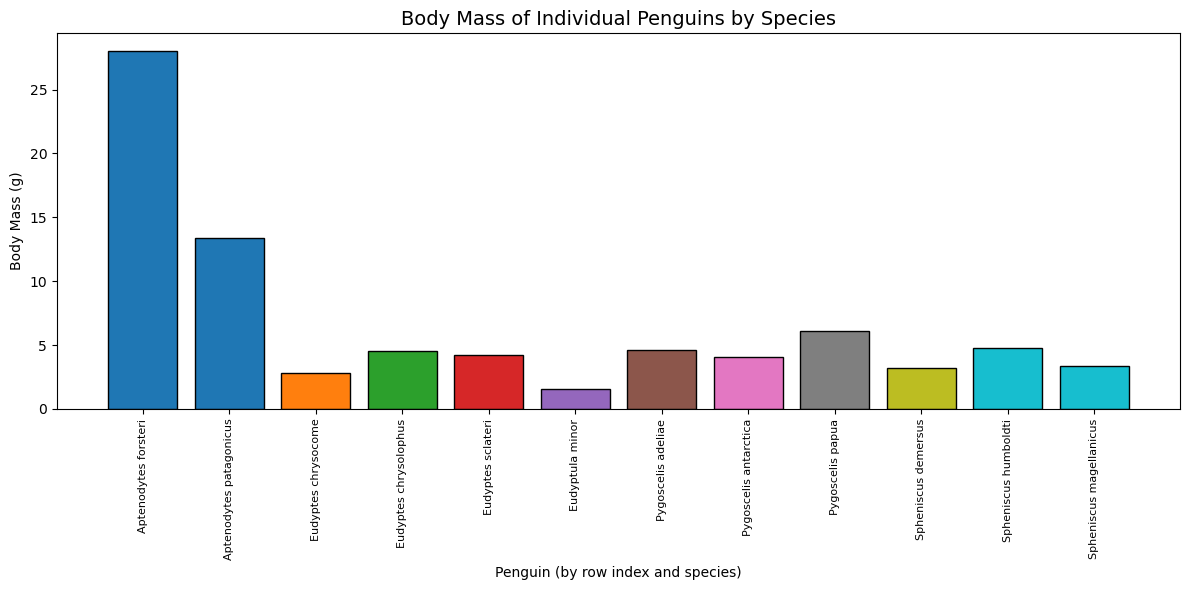

Q1 Answer:
The smallest  penguin weighs 1.6 g and belongs to the Eudyptula minor species.
Q2 Answer:
 The Eudyptula minor inhabits the coastal areas of Antarctica, particularly around the Antarctic continent and nearby islands.
 Eudyptula minor is primarily found in southern Australia and New Zealand.


In [47]:
## 8 ##
## Plot a bar-chart of the mass with the x-axes labeled with species names.
## *Q1* What is the smallest penguin species? 
## *Q2* What is the geographical range of this species?

# -------------------------------------------------------------
# 8 Plot a bar chart of body mass by species
# -------------------------------------------------------------
"""
Here the code generates a bar chart to visualize the body mass of individual penguins, grouped and color-coded by species.
It first assigns a unique color to each species using a colormap and applies those colors to each penguin's bar.
The x-axis displays the species labels for each individual penguin, while the y-axis represents their respective body mass in grams.
The plot provides a clear visual comparison of body mass distribution across different penguin species.
"""
# Reset the index to get a unique index for each row (optional, for plotting)
penguins_df = penguins_df.reset_index(drop=True)

# Generate a color for each bar based on species
species_list = penguins_df['species'].unique()
species_to_color = dict(zip(species_list, cm.tab10(np.linspace(0, 1, len(species_list)))))

# Assign a color to each row based on species
bar_colors = penguins_df['species'].map(species_to_color)

# Create the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(
    penguins_df.index,                  # Use row index for x-axis
    penguins_df['mass'],         # Plot each individual mass
    color=bar_colors,
    edgecolor='black'
)

# Add species labels as ticks (optional)
plt.xticks(
    ticks=penguins_df.index,
    labels=penguins_df['species'],
    rotation=90,
    ha='center',
    fontsize=8
)

# Add labels and title
plt.title('Body Mass of Individual Penguins by Species', fontsize=14)
plt.xlabel('Penguin (by row index and species)')
plt.ylabel('Body Mass (g)')

# Display the plot
plt.tight_layout()
plt.show()

## *Q1* What is the smallest penguin species? 
## *Q2* What is the geographical range of this species?

# Find the row with the minimum body mass
min_row = penguins_df.loc[penguins_df['mass'].idxmin()]

print(f"Q1 Answer:\nThe smallest  penguin weighs {min_row['mass']} g and belongs to the {min_row['species']} species.")

print("Q2 Answer:\n The Eudyptula minor inhabits the coastal areas of Antarctica, particularly around the Antarctic continent and nearby islands.\n Eudyptula minor is primarily found in southern Australia and New Zealand.")


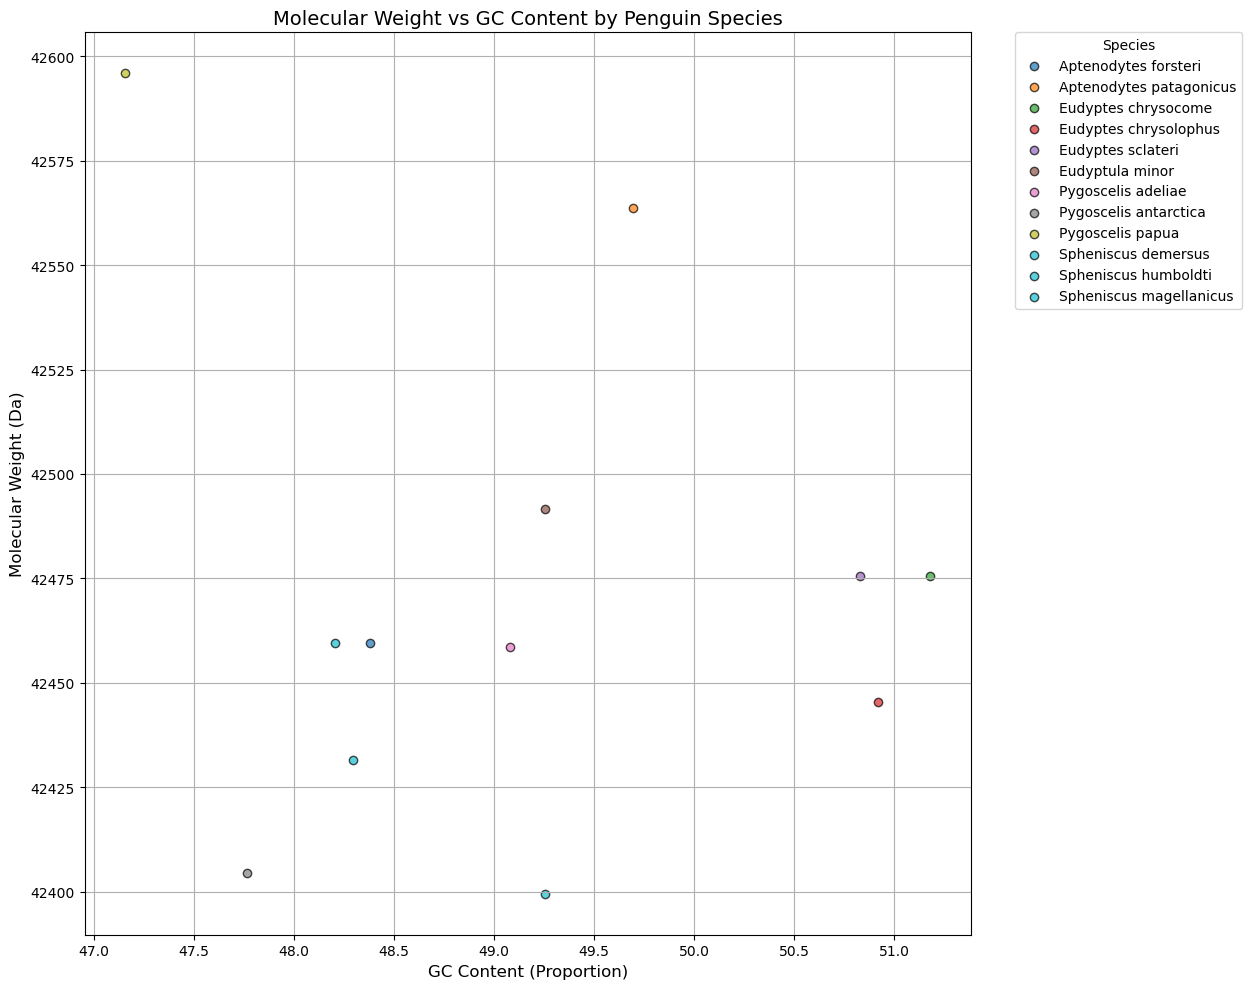

In [49]:
## 9 ##
## Plot a visualization of the molecular weight (y-axis) as a function of GC-content (x-axis).

# -------------------------------------------------------------
# 9 Scatter plot of Molecular Weight vs GC Content
# -------------------------------------------------------------
"""
This code visualizes the relationship between GC content and molecular weight for different penguin species, using a scatter plot.
It first checks that the necessary columns exist in the DataFrame, then assigns a unique color to each species.
Each species' data points are plotted with appropriate labels, colors, and styling for clarity.
The plot includes a title, axis labels, an external legend, and a grid for readability.

"""
# Ensure the required columns exist in the DataFrame before proceeding
if 'molecular_weight' in penguins_df.columns and 'gc_content' in penguins_df.columns:
    
    # Set the figure size to be large for better readability
    plt.figure(figsize=(16, 10))

    # Extract unique species names from the DataFrame
    species = penguins_df['species'].unique()

    # Generate a distinct color for each species using a colormap (tab10 has 10 distinct colors)
    colors = plt.cm.tab10(range(len(species)))

    # Create a dictionary mapping each species to a unique color
    species_color_map = dict(zip(species, colors))

    # Loop through each species and plot their data points
    for sp in species:
        # Subset the DataFrame for the current species
        subset = penguins_df[penguins_df['species'] == sp]

        # Plot molecular weight vs GC content for this species
        plt.scatter(
            subset['gc_content'],          # X-axis: GC content
            subset['molecular_weight'],    # Y-axis: molecular weight
            label=sp,                      # Label for the legend
            color=species_color_map[sp],   # Assign a unique color to the species
            alpha=0.7,                     # Set transparency for better visibility if points overlap
            edgecolor='black'              # Add a black edge around points for contrast
        )

    # Add a descriptive title and axis labels
    plt.title('Molecular Weight vs GC Content by Penguin Species', fontsize=14)
    plt.xlabel('GC Content (Proportion)', fontsize=12)
    plt.ylabel('Molecular Weight (Da)', fontsize=12)
    
    # Place the legend outside the plot to avoid overlapping with data points
    plt.legend(
        title='Species',                   # Add title to the legend
        bbox_to_anchor=(1.05, 1),          # Position legend to the right of the plot
        loc='upper left',                 
        borderaxespad=0.                   # No padding between plot and legend
    )

    # Adjust the layout to make room for the external legend
    plt.tight_layout(rect=[0, 0, 0.8, 1])

    # Show a grid for easier data comparison
    plt.grid(True)

    # Display the final plot
    plt.show()

else:
    # Print an error if the required columns are not present in the DataFrame
    print("Error: The DataFrame must include 'molecular_weight' and 'gc_content' columns.")

In [52]:
# -------------------------------------------------------------
# 10 Save the updated DataFrame to a CSV file
# -------------------------------------------------------------
"""
Here the code saves the penguins_df DataFrame as a CSV file named penguins_mass_cytb.csv in a specified directory.
It constructs the full file path using os.path.join.
After saving, it prints a confirmation message showing the exact path where the file was stored.
"""
# Save DataFrame to CSV in the current working directory
output_path = os.path.join(path, "penguins_mass_cytb.csv")
penguins_df.to_csv(output_path, index=False)

# Confirm the file has been saved
print(f"DataFrame successfully saved to: {output_path}")


DataFrame successfully saved to: C:\Users\lkgbe\OneDrive - Iowa State University\Documents\ISU\SPRING 2025\BCB4560\Python_Assigment\penguins_mass_cytb.csv


In [54]:
# -------------------------------------------------------------
#  11 - BONUS ##
# -------------------------------------------------------------
## What else can we do with this dataset in Python? 
## Add functions or anything that might be interesting and fun. (optional)
# -------------------------------------------------------------


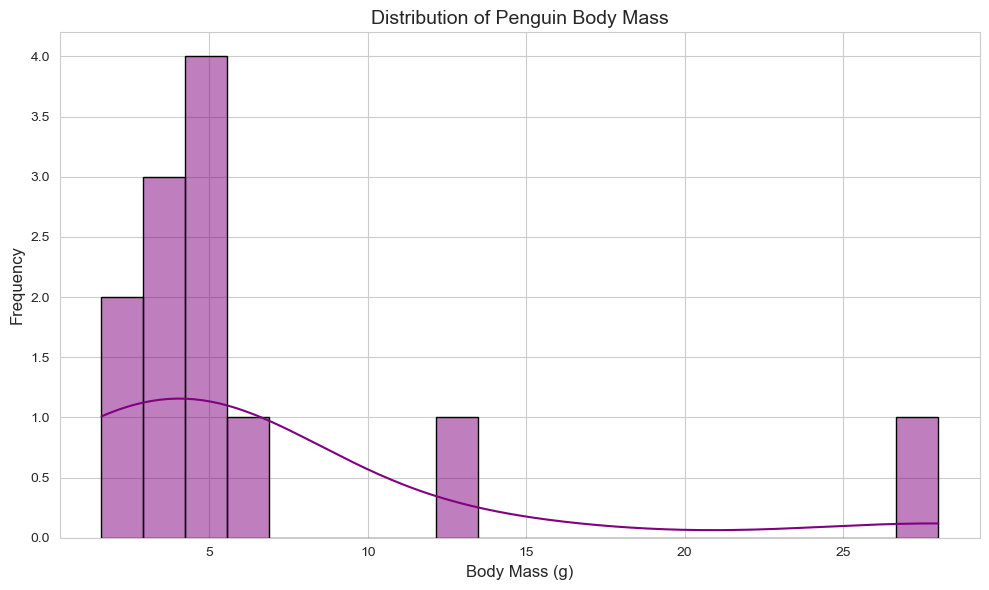

In [58]:
# -------------------------------------------------------------
#Histogram + KDE for Penguin Body Mass
# -------------------------------------------------------------

"""
Here the code creates a histogram with a KDE (Kernel Density Estimate) overlay to visualize the distribution of penguin body mass. It customizes the plot appearance with a white grid style, 20 bins, and semi-transparent purple bars outlined in black.
Axis labels and a title are included to provide context. The layout is adjusted for neatness, and the final plot is displayed.
"""
# Set up the plot size and style
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")

# Plot a histogram with a KDE overlay for body mass
sns.histplot(
    data=penguins_df,
    x='mass',
    kde=True,                 # Adds the KDE (Kernel Density Estimate) curve
    bins=20,                  # Number of histogram bins
    color='purple',          # Histogram color
    edgecolor='black',        # Edge color for bars
    alpha=0.5                 # Transparency of the histogram bars
)

# Add labels and title
plt.title("Distribution of Penguin Body Mass", fontsize=14)
plt.xlabel("Body Mass (g)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


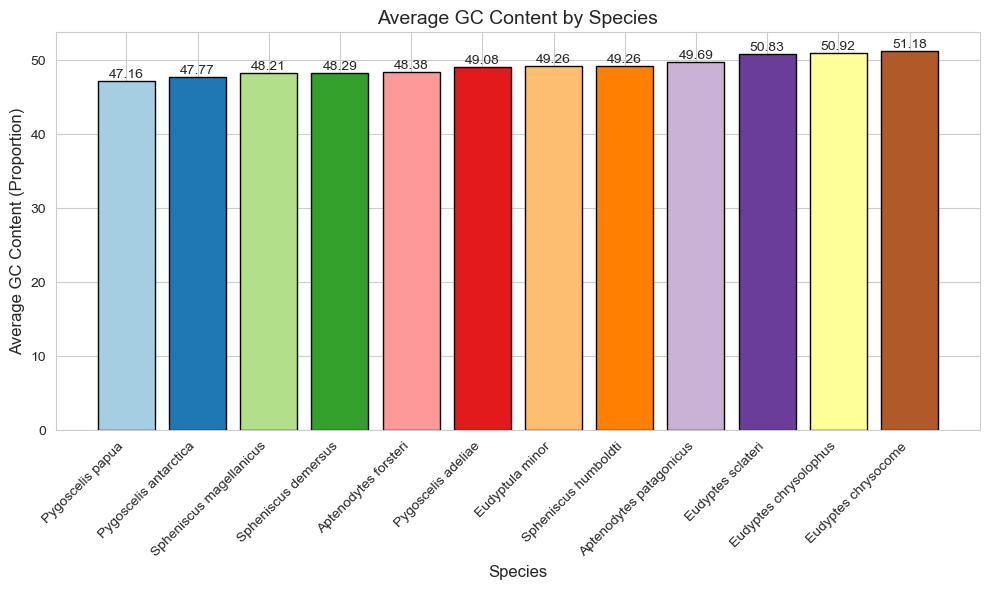

In [60]:
# -------------------------------------------------------------
#GC Content by Species
# -------------------------------------------------------------
"""
This code creates a histogram with a Kernel Density Estimate (KDE) overlay to visualize the distribution of penguin body mass.
It uses Seaborn and Matplotlib to style and size the plot, specifying 20 bins and a semi-transparent purple color for the bars.
Axis labels and a title are added for context, and the layout is adjusted to prevent overlapping elements.
Finally, the plot is displayed to the user.

"""


# Group by species and compute average GC content
avg_gc = penguins_df.groupby("species")["gc_content"].mean().sort_values()

# Generate colors
num_species = len(avg_gc)
colors = cm.Paired(np.linspace(0, 1, num_species))

# Create bar plot
plt.figure(figsize=(10, 6))
bars = plt.bar(avg_gc.index, avg_gc.values, color=colors, edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{height:.2f}",              # Format to 2 decimal places for proportions
        ha='center',
        va='bottom',
        fontsize=10
    )

# Set title and axis labels
plt.title("Average GC Content by Species", fontsize=14)
plt.xlabel("Species", fontsize=12)
plt.ylabel("Average GC Content (Proportion)", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Adjust layout and show plot
plt.tight_layout()
plt.show()


Correlation between body mass, molecular weight, and GC content:
                       mass  molecular_weight  gc_content
mass              1.000000          0.158676   -0.176025
molecular_weight  0.158676          1.000000   -0.104522
gc_content       -0.176025         -0.104522    1.000000


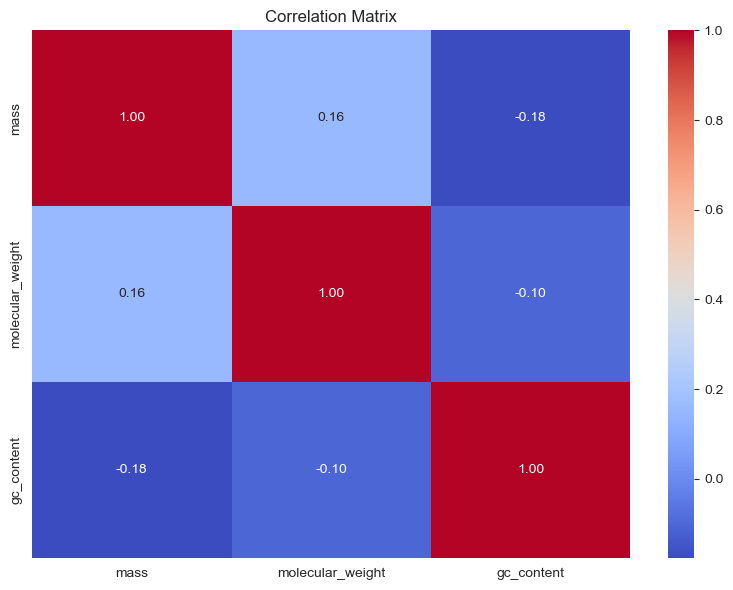

In [65]:
# -------------------------------------------------------------
# Correlation Analysis
#Explore how GC content, molecular weight, and body mass relate to each other.
# -------------------------------------------------------------

"""
This code calculates and visualizes the correlation matrix for three numerical features: body mass, molecular weight, and GC content in the penguins_df DataFrame.
It first computes the correlations and prints them to the console. 
Then, a heatmap is createed using Seaborn to display the strength and direction of these relationships with color coding and annotation. 
"""

# Compute correlation matrix for key numeric features
correlation = penguins_df[['mass', 'molecular_weight', 'gc_content']].corr()

# Display the correlation values
print("Correlation between body mass, molecular weight, and GC content:\n", correlation)

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()



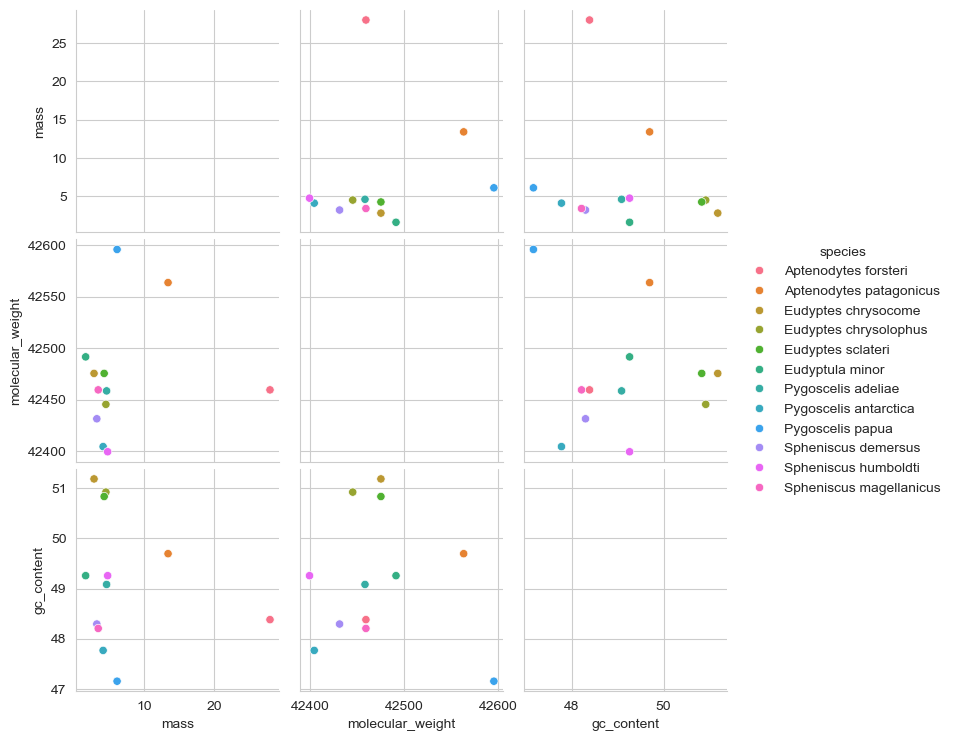

<Figure size 1600x1200 with 0 Axes>

In [71]:
# -------------------------------------------------------------
#Pairwise Plot
#Visualize distributions and pairwise relationships grouped by species.
# -------------------------------------------------------------
""""
This code generates a pair plot to visualize pairwise relationships among body mass, molecular weight, and GC content in the penguins_df DataFrame.
Each scatter plot in the grid is colored by penguin species to highlight group differences. 
The hue parameter enables easy visual comparison across species, and a title is added above the plot. 
The final plot is displayed with appropriate spacing for readability.
"""
sns.pairplot(
    penguins_df, 
    hue="species",  # Color by species
    vars=["mass", "molecular_weight", "gc_content"]  # Features to compare
)
plt.figure(figsize=(16, 12))
plt.suptitle("Pairwise Relationships by Species", y=1.02)
plt.show()

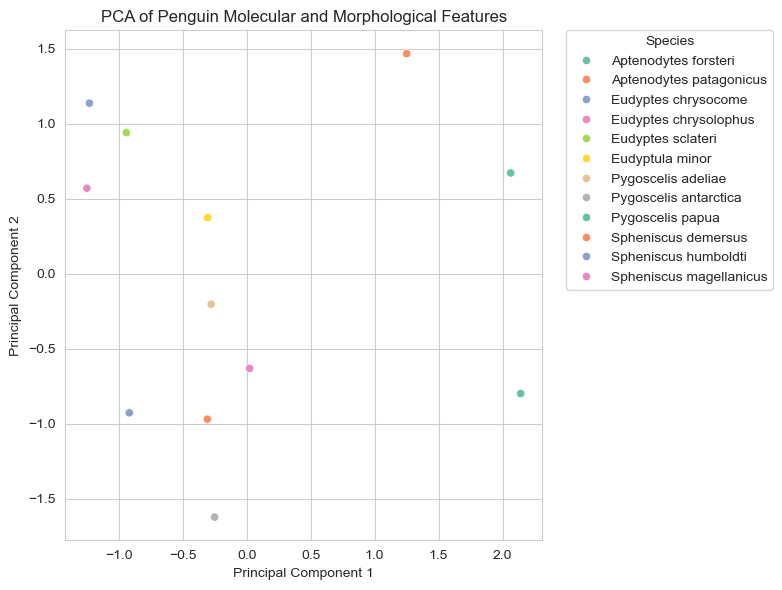

In [73]:
# -------------------------------------------------------------
# Principal Component Analysis (PCA)
# Reduce dimensionality and visualize species clusters.
# -------------------------------------------------------------
"""
Here the code performs Principal Component Analysis (PCA) on three numeric features—mass, molecular weight, and GC content—from the penguins_df DataFrame. 
It first removes rows with missing values, standardizes the data, and reduces it to two principal components. 
These components are added to the DataFrame and visualized in a scatter plot, with each point colored by species to highlight group differences.
"""
# Define the numeric features
features = ['mass', 'molecular_weight', 'gc_content']

# Drop rows with missing values in those columns
clean_df = penguins_df.dropna(subset=features)

# Standardize the data for PCA (zero mean, unit variance)
X_scaled = StandardScaler().fit_transform(clean_df[features])

# Run PCA to reduce to 2 principal components
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

# Add PC1 and PC2 to the DataFrame
clean_df['PC1'] = components[:, 0]
clean_df['PC2'] = components[:, 1]

# Plot the PCA result with species coloring
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PC1', y='PC2', hue='species', data=clean_df, palette='Set2')

# Add title and axis labels
plt.title("PCA of Penguin Molecular and Morphological Features")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Move legend outside the plot
plt.legend(title='Species', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

# Improve layout to accommodate the external legend
plt.tight_layout()
plt.show()

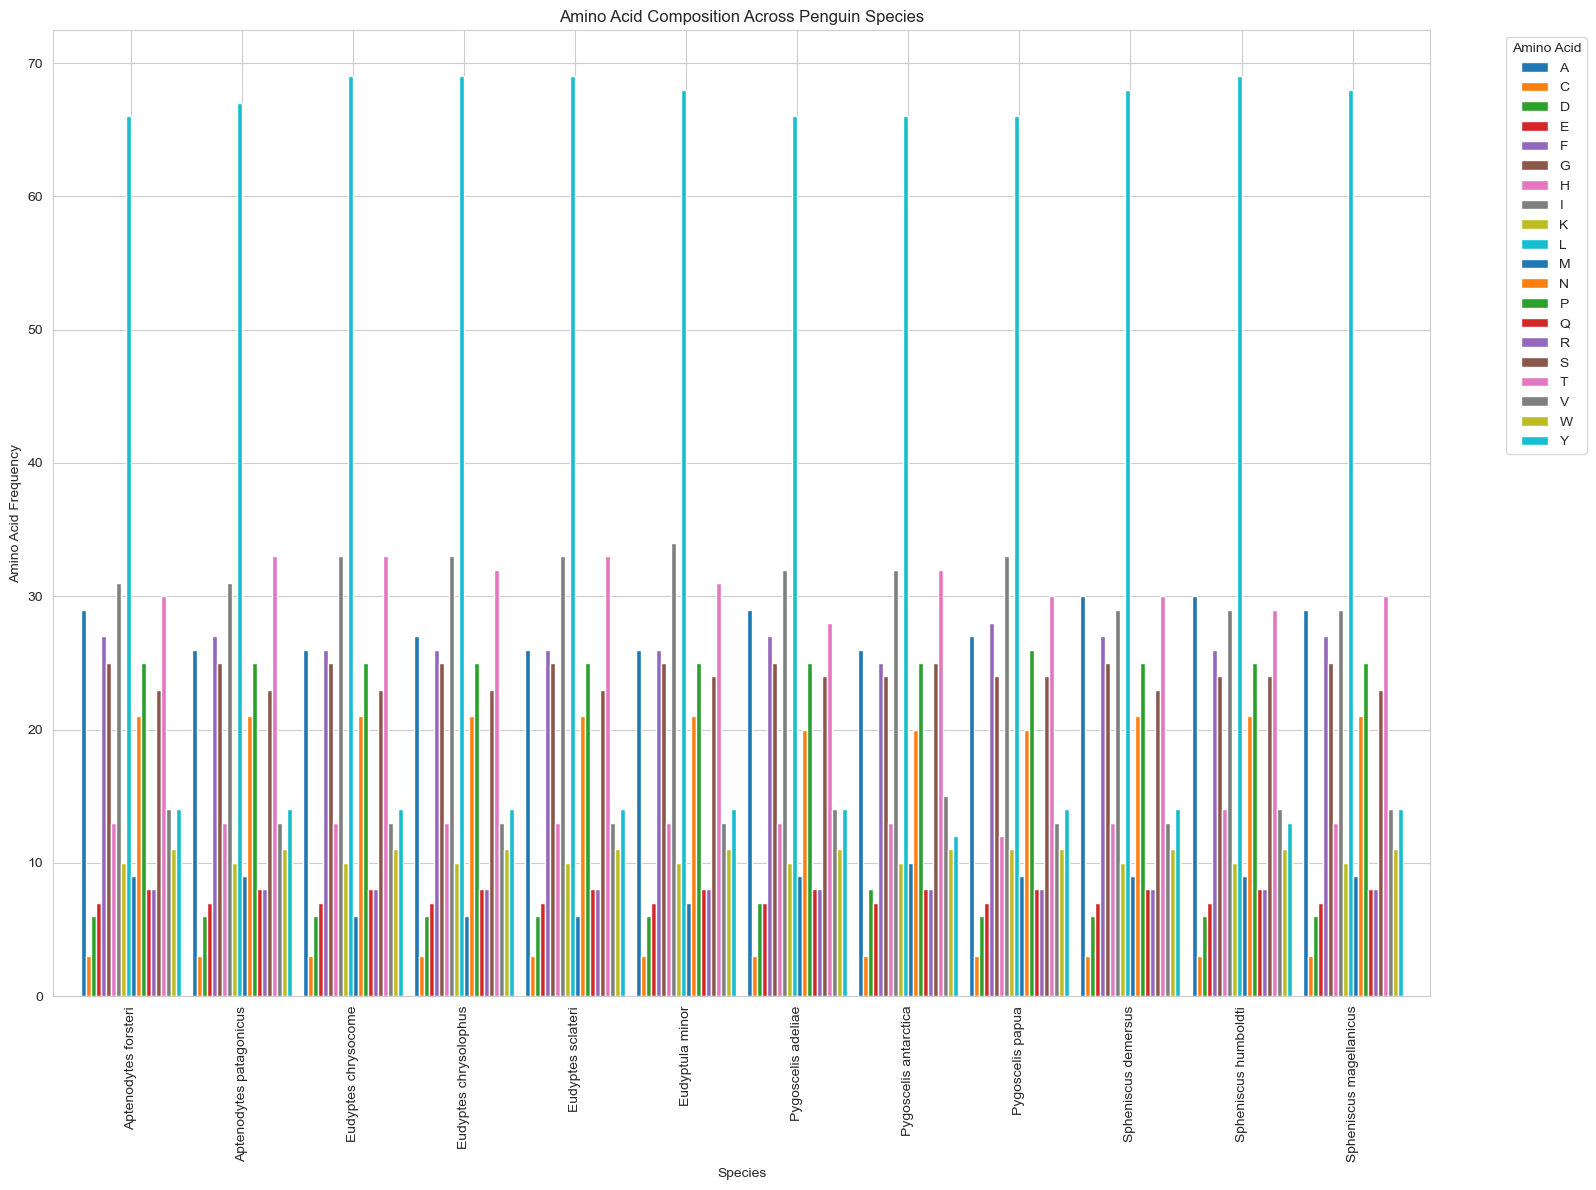

In [98]:
# -------------------------------------------------------------
# Amino Acid Composition
# Analyze the frequency of each amino acid in the species’ protein sequence.
# -------------------------------------------------------------
"""
This code analyzes and visualizes the amino acid composition of cytochrome b sequences across different penguin species. 
It defines a function to count amino acids in a translated protein sequence, then iterates through DNA sequences to compute these counts per species. 
The resulting data is organized into a DataFrame, cleaned, and transposed so species are rows and amino acids are columns. 
Finally, it plots a grouped bar chart showing the frequency of each amino acid by species, with labeled axes and a legend for clarity.
"""
# Define a function to count each amino acid in the sequence
def amino_acid_composition(aa_seq):
    return Counter(aa_seq)

# Create a DataFrame to store amino acid counts per species
aa_df = pd.DataFrame()

# Populate the DataFrame
for species, dna_seq in cytb_seqs.items():
    translated_seq = biopython_translation(dna_seq)
    aa_counts = amino_acid_composition(translated_seq)
    aa_df[species] = pd.Series(aa_counts)

# Replace NaNs with 0 and transpose so rows = species, columns = amino acids
aa_df = aa_df.fillna(0).T

# Sort columns (amino acids) alphabetically
aa_df = aa_df[sorted(aa_df.columns)]

# Plot grouped bar plot
aa_df.plot(kind='bar', figsize=(16, 12), width=0.9)
plt.xlabel('Species')
plt.ylabel('Amino Acid Frequency')
plt.title('Amino Acid Composition Across Penguin Species')
plt.legend(title='Amino Acid', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()